In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [94]:
data = pd.read_csv(r"C:\Users\golli\Downloads\archive\Patient_Data_Testing_Features.csv")


In [95]:
data.head()



,ID,Year,Age,Race,Sex,State,Zip Code,MSA,Enrollment Type Categorized,Enrollment Months,...,# Imaging,# Part B Imaging,# Part B E&M,# Part B Drugs,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous
0,44782019,2019,71,White,Male,Michigan,48848,99022,10,12.0,...,2,6,6.0,0,1,0,0.0,78,0,0
1,44842017,2017,75,White,Male,Michigan,49765,99022,10,12.0,...,1,1,1.0,3,0,0,0.0,112,14,0
2,44842018,2018,76,White,Male,Michigan,49765,99022,10,12.0,...,1,2,2.0,3,1,0,0.0,43,9,0
3,44862019,2019,73,White,Male,Michigan,48617,99022,10,12.0,...,3,3,3.0,0,1,0,0.0,55,11,0
4,44862018,2018,72,White,Male,Michigan,48617,99022,10,12.0,...,1,1,1.0,1,0,0,0.0,70,4,0


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4084 non-null   int64  
 1   Year                         4084 non-null   int64  
 2   Age                          4084 non-null   int64  
 3   Race                         4084 non-null   object 
 4   Sex                          4084 non-null   object 
 5   State                        4084 non-null   object 
 6   Zip Code                     4084 non-null   object 
 7   MSA                          4084 non-null   object 
 8   Enrollment Type Categorized  4084 non-null   int64  
 9   Enrollment Months            4084 non-null   float64
 10  HCC Score                    4071 non-null   float64
 11  Avg. LOS                     4084 non-null   float64
 12  Diagnosis                    4084 non-null   int64  
 13  # Total Claims    

In [97]:
#Selecting cost-related columns for a simplified total cost approximation
cost_related_cols = ['# Total Claims', '# Hospital OP', '# All Physician OP', '# Inpatient','# Short Term Stay Hospital', '# ER', '# SNF', '# Home Health', '# Hospice', '# Labs','# Part B Labs', '# Imaging', '# Part B Imaging', '# Part B Drugs', '# Dialysis']

In [98]:
#target variable ” High_low_cost," binary label indicating whether a patient's total healthcare usage is classified as high (above the median) or low (below the median). 

In [99]:
data['Total_Cost_Indicator'] = data[cost_related_cols].sum(axis=1)
median_cost = data['Total_Cost_Indicator'].median()
data['High_Low_Cost'] = data['Total_Cost_Indicator'].apply(lambda x: 1 if x > median_cost else 0)

In [100]:
# Feature Selection
features = ['Age', 'Race', 'Sex', 'Enrollment Months', 'HCC Score', 'Avg. LOS', '# Total Claims','# Hospital OP', '# ER', '# SNF', '# Home Health', '# Labs']


In [101]:
print(features)

['Age', 'Race', 'Sex', 'Enrollment Months', 'HCC Score', 'Avg. LOS', '# Total Claims', '# Hospital OP', '# ER', '# SNF', '# Home Health', '# Labs']


In [102]:
X = data[features]
y = data['High_Low_Cost']

In [103]:
#Categorical variables such as Race and Sex were encoded using label encoding to ensure compatibility 

In [104]:
label_encoders = {}
for column in ['Race', 'Sex']:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  
    label_encoders[column] = le
    

In [105]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


In [107]:
#Train the Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

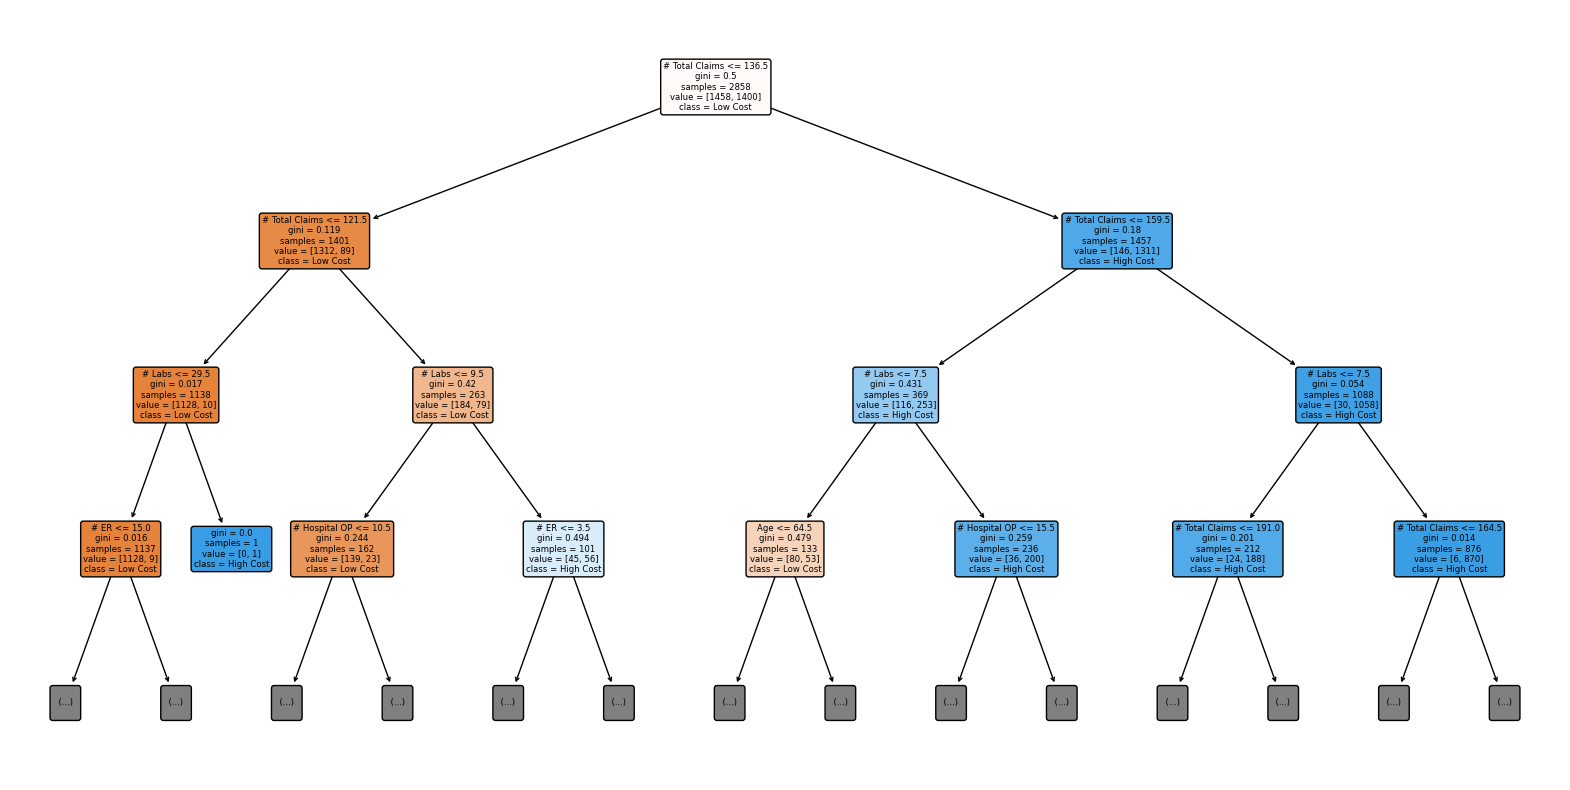

In [108]:
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,max_depth=3, filled=True, feature_names=list(X_imputed.columns), class_names=['Low Cost', 'High Cost'], rounded=True)
plt.show()

In [109]:
#Evaluate the Model
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
conf_matrix = confusion_matrix(y_test, y_pred)

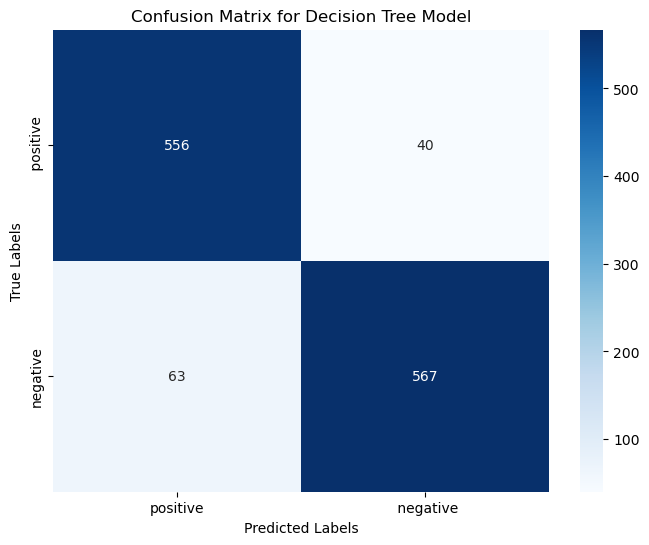

In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', ' negative'], yticklabels=[' positive', 'negative'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [114]:
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Model Accuracy: 0.9159869494290375
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       596
           1       0.93      0.90      0.92       630

    accuracy                           0.92      1226
   macro avg       0.92      0.92      0.92      1226
weighted avg       0.92      0.92      0.92      1226



In [115]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [116]:
# Probability of the positive class (high cost)
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

In [117]:
# ROC curve Calculation
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

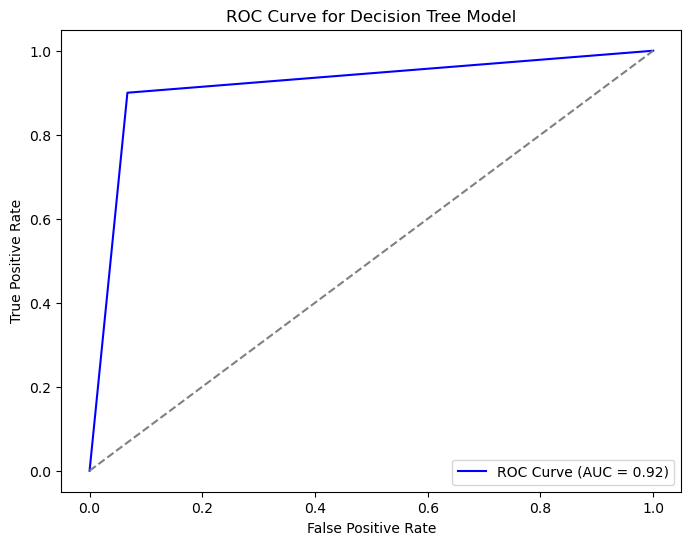

AUC: 0.9164429530201342


In [118]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc)